<a href="https://colab.research.google.com/github/aman0s/AirBnd-Bookings-Analysis/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path ='/content/drive/MyDrive/capstone//Airbnb NYC 2019.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
selected_columns = set(df.columns) - {'latitude', 'longitude', 'id', 'host_id'}
df[selected_columns].describe()

,price,calculated_host_listings_count,reviews_per_month,availability_365,number_of_reviews,minimum_nights
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.143982,1.090910,112.781327,23.274466,7.029962
std,240.154170,32.952519,1.597283,131.622289,44.550582,20.510550
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,69.000000,1.000000,0.040000,0.000000,1.000000,1.000000
50%,106.000000,1.000000,0.370000,45.000000,5.000000,3.000000
75%,175.000000,2.000000,1.580000,227.000000,24.000000,5.000000
max,10000.000000,327.000000,58.500000,365.000000,629.000000,1250.000000


In [ ]:
col_list = df[selected_columns].describe().columns.tolist()

Information about listings and hosts

In [ ]:
hosts_areas = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(5)


,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,327
1837,Blueground,Brooklyn,232
1838,Blueground,Manhattan,232
7279,Kara,Manhattan,121
7482,Kazuya,Brooklyn,103


We see that Manhattan and Brooklyn have the highest number of listings.

In [ ]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

df['Days'], df['Month'], df['Years'] = (df['last_review'].dt.day, df['last_review'].dt.month, df['last_review'].dt.year)
df['last_review'] = pd.to_datetime(df['last_review']).dt.date

Text(0.5, 1.0, 'No of Guest in months of the years')

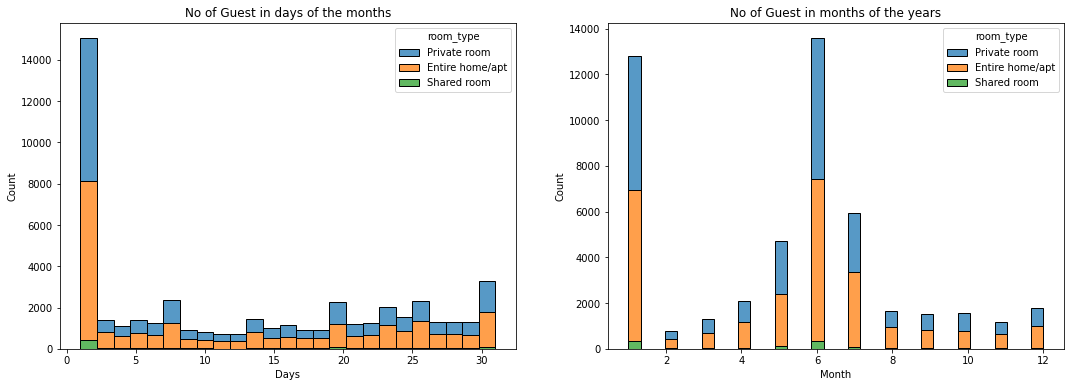

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
ax = axes.flatten()

sns.histplot(data=df, x='Days', hue='room_type', multiple="stack", ax=ax[0])
ax[0].set_title('No of Guest in days of the months')
sns.histplot(data=df, x='Month', hue='room_type', multiple="stack", ax=ax[1])
ax[1].set_title('No of Guest in months of the years')

Through these plots we observe that number of guests in the starting of the month is high as compared to rest of the days.While if we look monthwise the highest number of guests are seen in the month of January and June.

We're now going to plot the charts relative to neighbourhood_group below...

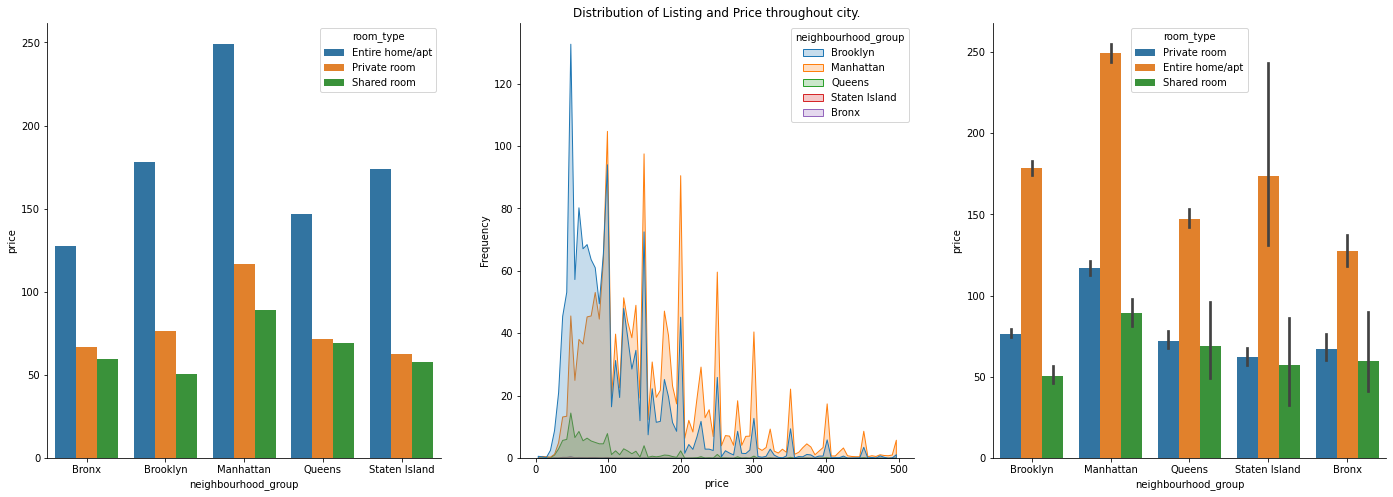

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,8))
ax = axes.flatten()

# group_price_df = df.groupby('neighbourhood_group')['price'].agg([np.max, np.mean, np.min]).reset_index()
mean_price_df = df.groupby(['neighbourhood_group', 'room_type'], as_index=False)[['price']].mean()
sns.barplot(data=mean_price_df, x='neighbourhood_group', y ='price', hue='room_type', ax=ax[0])

sns.histplot(data=df[df['price'] < 500], x="price", hue="neighbourhood_group", stat='frequency', element='poly', ax=ax[1])
sns.barplot(data=df, x='neighbourhood_group', y='price', hue='room_type', ax=ax[2])
ax[1].set_title('Distribution of Listing and Price throughout city.')
sns.despine(fig)

From the above graph we  can understand that Manhattan and Brooklyn stands within the most active areas in terms of listing areas and pricing as well.They have the highest average room price, just after them stands Staten Island. Shared room has the least number of count as well as least cost.

In [ ]:
price_area = df.groupby(["price"])["number_of_reviews"].max().reset_index()
price_area.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


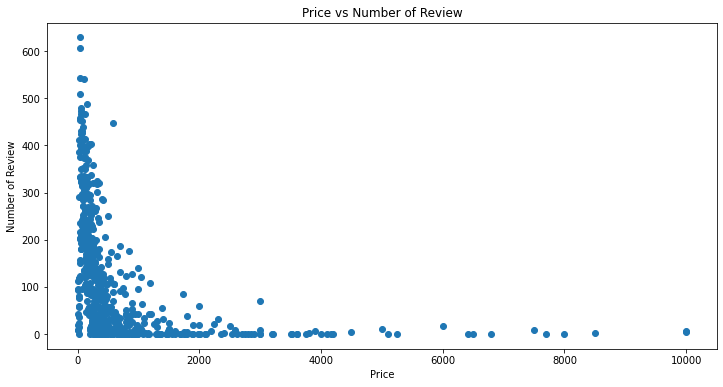

In [ ]:
area = price_area['price']
price = price_area['number_of_reviews']
fig = plt.figure(figsize = (12, 6))
 
plt.scatter(area, price)
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Review")
plt.show()


From the above graph, we can understand Brooklyn and Manhattan stands within the most urban and active area, in terms of listing areas and pricing. Manhattan & Brooklyn has highest avg room price, though Staten Island is not far behind. Shared room has relatively low price and also low in count in all the neighbourhood, whilst Manhattan has most number of Entire home/apt category, but Brooklyn has most number of Private room category.Also we can see that rooms with less price have highest number of reviews.

Lets see the proportion and price range of entire house/apartment  , private room and shared room in total listing

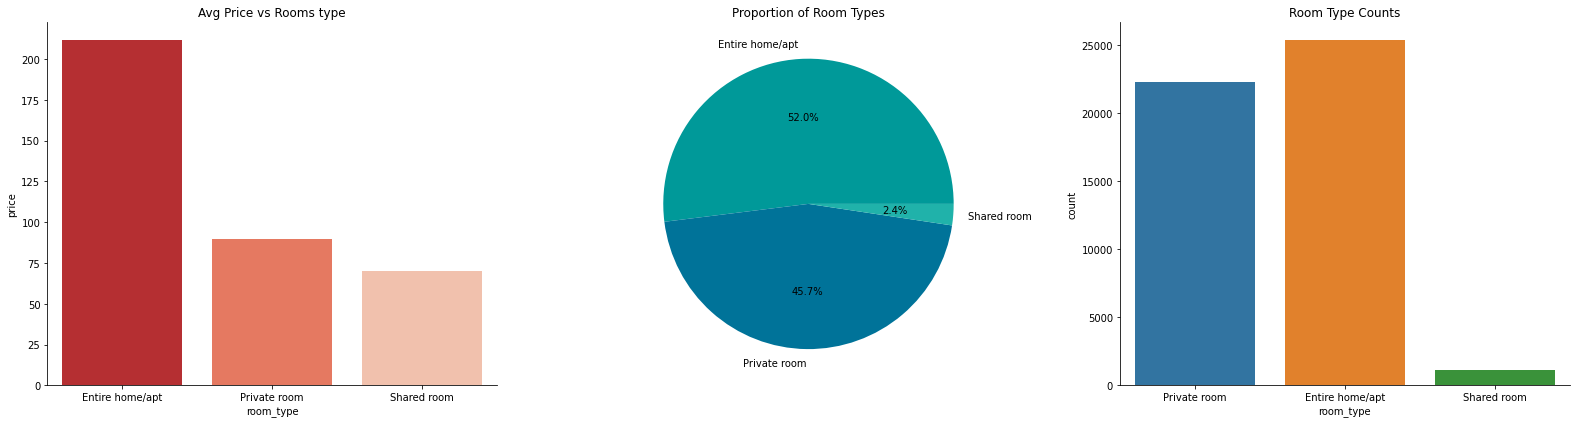

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 6))
ax = axes.flatten()

mean_price_df = df.groupby('room_type', as_index=False)[['price']].mean()
sns.barplot(data=mean_price_df, x='room_type', y='price', palette='Reds_r', ax=ax[0])
ax[0].set_title("Avg Price vs Rooms type");

labels = df['room_type'].value_counts().index
sizes = df['room_type'].value_counts().values
ax[1].pie(sizes, labels=labels, autopct='%1.1f%%', colors = ['#009999','#007399','#20B2AA'])
ax[1].set_title('Proportion of Room Types')

sns.countplot(data=df, x='room_type', ax=ax[2])
ax[2].set_title('Room Type Counts')

sns.despine(fig)
plt.tight_layout(h_pad=0.5, w_pad=0.8)

Entire home/apt has more than 50% proportion in New York City and it too has the highest avg price also. Shared room are the cheapest, but only has 2.4% proportion.Which gives us a insight that life in New York City is pretty high standard

Let's see the distribution of price throughout the neighbourhood group with respect to types of rooms.

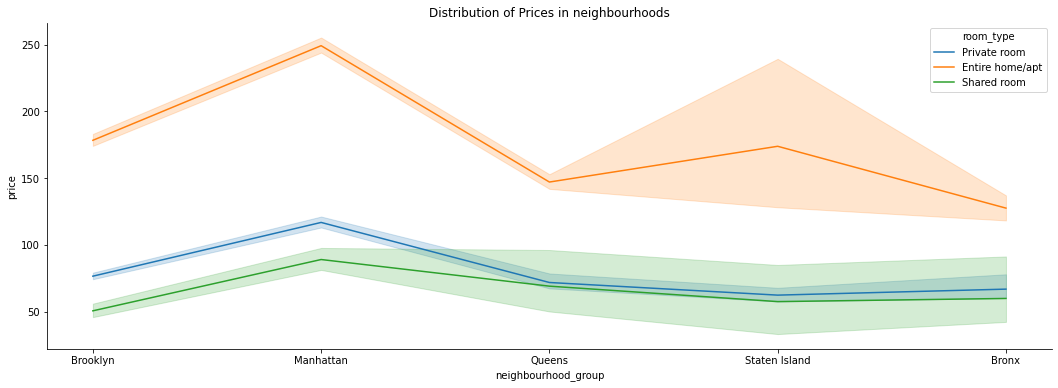

In [ ]:
fig = plt.figure(figsize = (18, 6))
sns.lineplot(data=df, x='neighbourhood_group', y='price', hue='room_type')
plt.title('Distribution of Prices in neighbourhoods')
sns.despine(fig)

Through the lineplot we can see that entire home/apartment has maintained a higher price range throughout the neighbourhood_group, below that is the private room while shared room maintains a low price range all through the neighbourhood_group.

Now finally lets see the correlation between different factors which somehow or the other effect the AirBnb listing

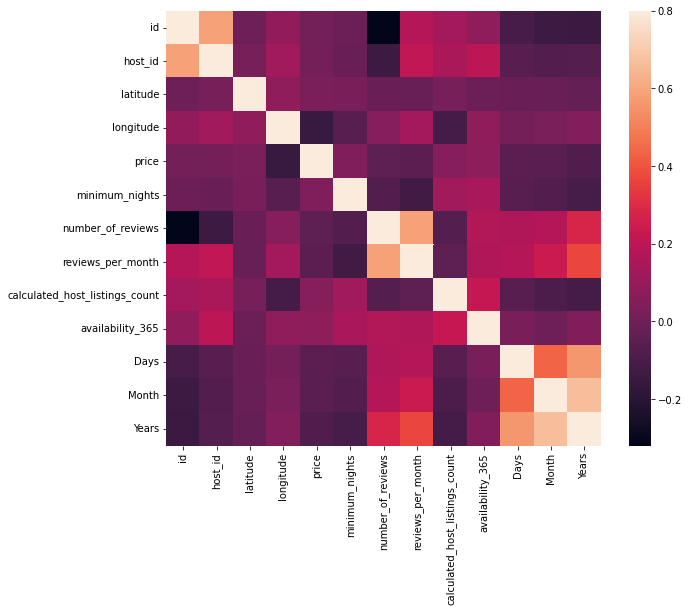

In [ ]:
corrmat = df.corr()
fig = plt.figure(figsize = (10, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

Clearly from the heatmap we can see the correlation between different features that can affect an airbnb listing.
There is a correlation between host_id to reviews_per_month and availability_365.Also there is a noticiable correlation  between minimum_nights to no_of_lisitngs_count and availability_365
Price also shows some correlation with availability_365 and host_lisitng_count.